# Workspace Prep

The following code cells are preparing the environment and dataset for analysis.

In [2]:
# import libraries required for this notebook

# import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_palette('crest')

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
# import joblib

In [3]:
# files used in the model creation process
orig_file = '../datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv'

# files used to store a clean version of the processed data before 
processed_file = '../datasets/HR_attrition_orig_proc.csv'

# files used in the model creation process
train_x_file = '../datasets//HR_attrition_train_x.csv'
test_x_file = '../datasets/HR_attrition_test_x.csv'
train_y_file = '../datasets/HR_attrition_train_y.csv'
test_y_file = '../datasets/HR_attrition_test_y.csv'

train_x_nb_file = '../datasets/HR_attrition_train_x_nb.csv'
test_x_nb_file = '../datasets/HR_attrition_test_x_nb.csv'

train_x_lr_file = '../datasets/HR_attrition_train_x_lr.csv'
test_x_lr_file = '../datasets/HR_attrition_test_x_lr.csv'
train_x_nn_file = '../datasets/HR_attrition_train_x_nn.csv'
test_x_nn_file = '../datasets/HR_attrition_test_x_nn.csv'


In [4]:

# Constants

ISRESIGNED_T = 'Attrition'

# employee related information
AGE = 'Age'
EDUCATION_T = 'EducationField'
GENDER_T = 'Gender'
COMPANIES = 'NumCompaniesWorked'
STATUS_T = 'MaritalStatus'
HOMEDISTANCE = 'DistanceFromHome'

# role of the employee in the company
ROLE_T = 'JobRole'
LEVEL = 'JobLevel'
DEPARTMENT_T = 'Department'
YEARSCOMPANY = 'YearsAtCompany'
YEARSEMPLOYED = 'TotalWorkingYears'
YEARSROLE = 'YearsInCurrentRole'
YEARSLASTPROMO = 'YearsSinceLastPromotion'
YEARSMANAGER = 'YearsWithCurrManager'

# satisfaction informaiton
SATISFACTION = 'JobSatisfaction'
TEAMCLICK = 'RelationshipSatisfaction'
LIFEBALANCE = 'WorkLifeBalance'
ENVIRONMENT = 'EnvironmentSatisfaction'

# salary and money related
SALARY = 'MonthlyIncome'
MONTHLYRATE = 'MonthlyRate'
DAILYRATE = 'DailyRate'  # Daily rate = the amount of money you are paid per day
HOURLYRATE = 'HourlyRate'

# Percent salary hike = the % change in salary from 2016 vs 2015.
LASTINCREMENTPERCENT = 'PercentSalaryHike'
STOCKOPTIONS = 'StockOptionLevel' # Stock option level = how much company stocks you own.
TRAINING = 'TrainingTimesLastYear'

# rating and involvement related
RATING = 'PerformanceRating'
INVOLVEMENT = 'JobInvolvement'
OVERTIME_T = 'OverTime'  # Y/N
TRAVEL_T = 'BusinessTravel'  # rare / requent

# redundant fields
EMPLYEENO_R = 'EmployeeNumber'  # number
EMPLOYEECOUNT_R = 'EmployeeCount'  # all 1
ISOVER18_R = 'Over18'  # all Y
STDHOURS_R = 'StandardHours'  # all 40


In [5]:
column_drop_list = [EMPLYEENO_R, EMPLOYEECOUNT_R,
                    ISOVER18_R, STDHOURS_R]
encode_list = [GENDER_T, STATUS_T, DEPARTMENT_T, ROLE_T,
               OVERTIME_T, TRAVEL_T, ISRESIGNED_T, EDUCATION_T]

In [6]:
# header_orig: the original column names
# data_orig: the original data
# header_massaged: the column name list after factors being created
# data_massaged: the data after factors being created
# data_analytics: quick analytics of data
# data_m_df: dataframe with the cleaned and processed data


data_df = pd.read_table(orig_file, sep=',')
# print(data_df)

# check that dataframe does not contain null values
contains_nulls = data_df.isna().sum().sum()

header_orig = np.array(data_df.columns.values).squeeze()
data_orig = np.array(data_df.values)

# create a clone dataframe that will be 'massaged'
data_m_df = data_df.copy(deep=True)

for encode_item in encode_list:
    data_m_df[encode_item].replace(data_m_df[encode_item].unique(), range(
        0, len(data_m_df[encode_item].unique())), inplace=True)

for drop_column_item in column_drop_list:
    del data_m_df[drop_column_item]

header_massaged = np.array(data_m_df.columns.values).squeeze()
data_massaged = np.array(data_m_df.values)

data_analytics = {
    'nulls' : contains_nulls,
    'shape': data_df.shape,
    'description': data_m_df.describe(),
    'correlation': data_m_df.corr()
}


In [7]:
print('Dataset contains', data_analytics['nulls'], 'null values')

print('Dataset shape:', format(data_analytics['shape']))

print(data_analytics['description'])

Dataset contains 0 null values
Dataset shape: (1470, 35)
               Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.838776        0.392517   802.485714     0.739456   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     1.000000        0.000000   465.000000     0.000000   
50%      36.000000     1.000000        0.000000   802.000000     1.000000   
75%      43.000000     1.000000        1.000000  1157.000000     1.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        1.462585                 2.721769   
std   

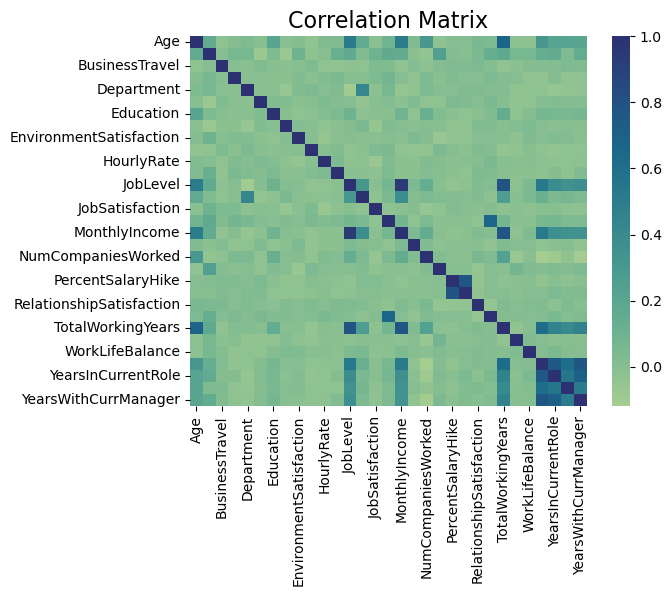

In [8]:
sns.heatmap(data_analytics['correlation'], cbar=True,
            cmap="crest")
plt.title("Correlation Matrix", fontsize=16,)
plt.show()  # very low correlation among the numeric variables, i.e. they all play important results


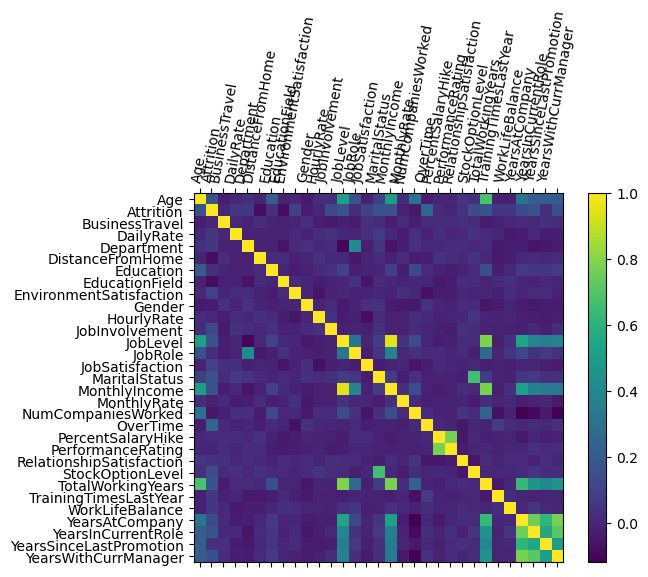

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data_analytics['correlation'])
fig.colorbar(cax)
ticks = np.arange(0, len(header_massaged), 1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(header_massaged)
ax.set_yticklabels(header_massaged)

for tick in ax.get_xticklabels():
    tick.set_rotation(80)

plt.show()


In [10]:
data_m_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


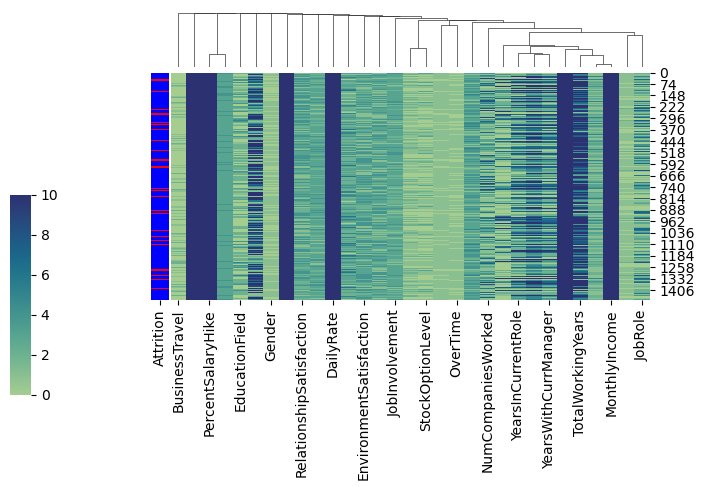

In [11]:
lut = dict(zip(data_m_df.Attrition.unique(), "rbg"))
row_colors = data_m_df.Attrition.map(lut)
sns.clustermap(data_m_df, figsize=(7, 5),
               row_cluster=False,
            #    standard_scale=1,
            #    z_score=0, center=0,
            #    dendrogram_ratio=(.1, .2),
               row_colors=row_colors,
               cmap="crest", 
               vmin=0, 
               vmax=10,
               metric="correlation", method="single",
               cbar_pos=(0, .2, .03, .4))


In [12]:
features_to_analyse = [
    EDUCATION_T, GENDER_T,
    COMPANIES, STATUS_T,
    ROLE_T, LEVEL,
    DEPARTMENT_T,
    SATISFACTION, TEAMCLICK,
    LIFEBALANCE, ENVIRONMENT,
    STOCKOPTIONS, TRAINING,
    RATING,
    INVOLVEMENT, OVERTIME_T, TRAVEL_T
]

attrition_true=1
attrition_false=0

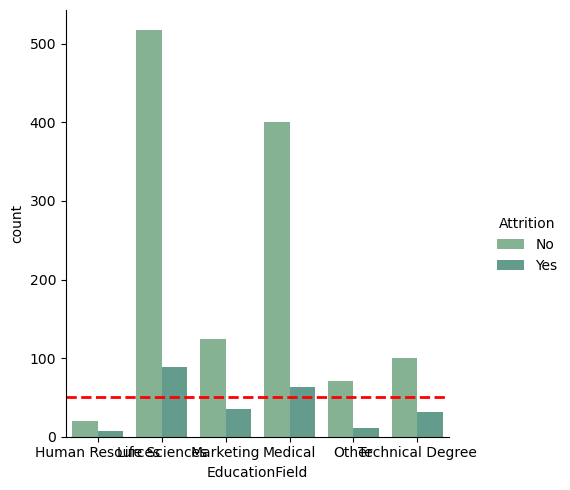

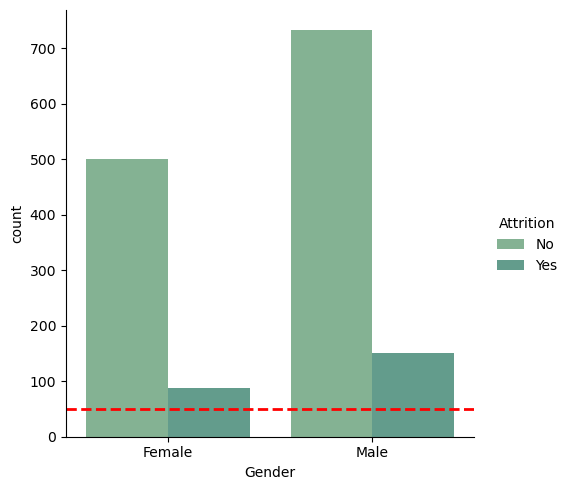

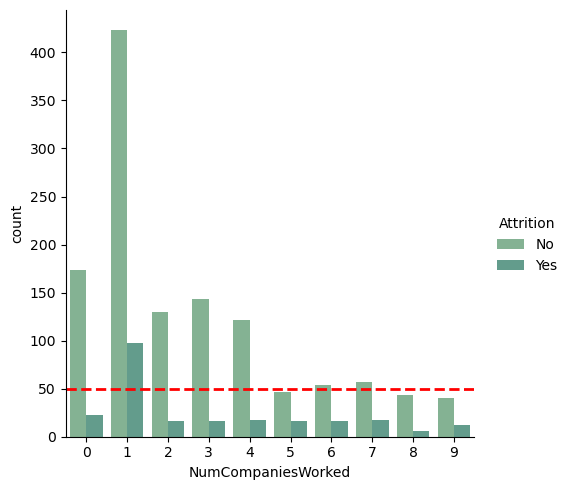

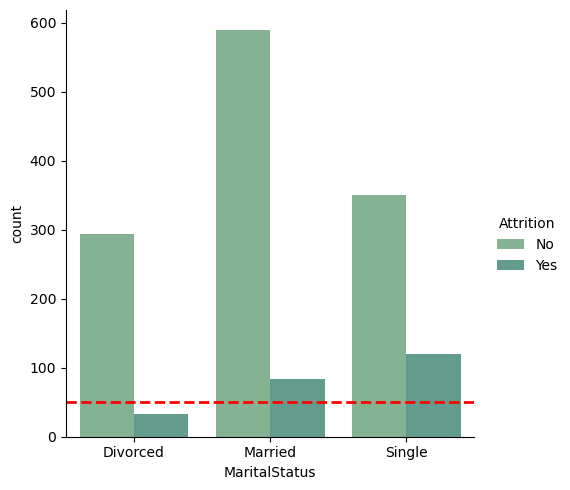

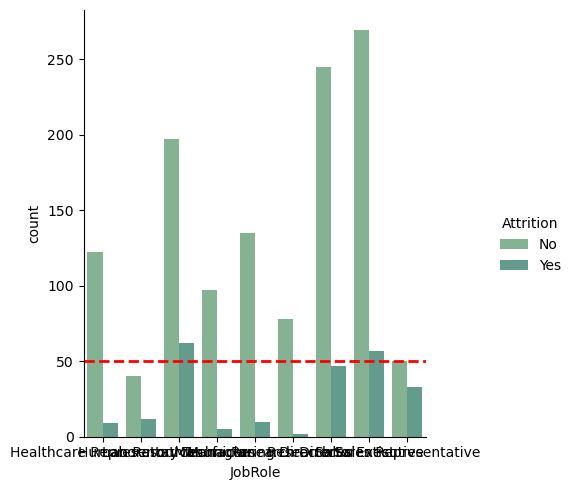

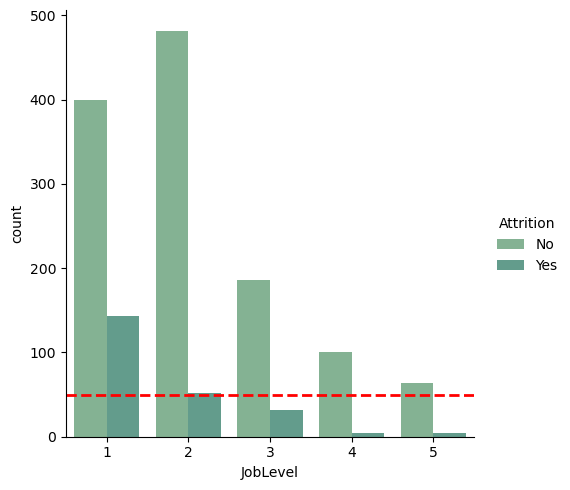

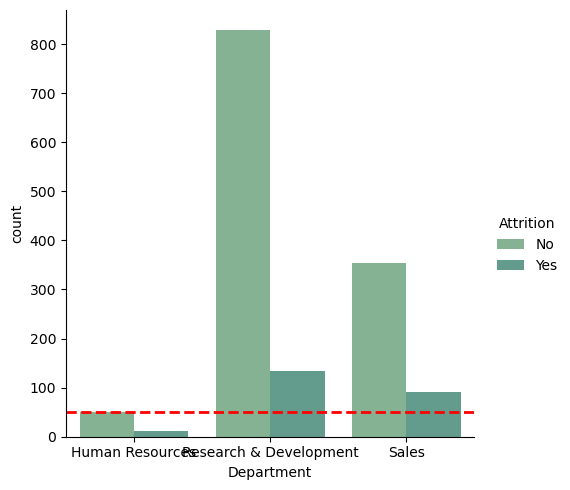

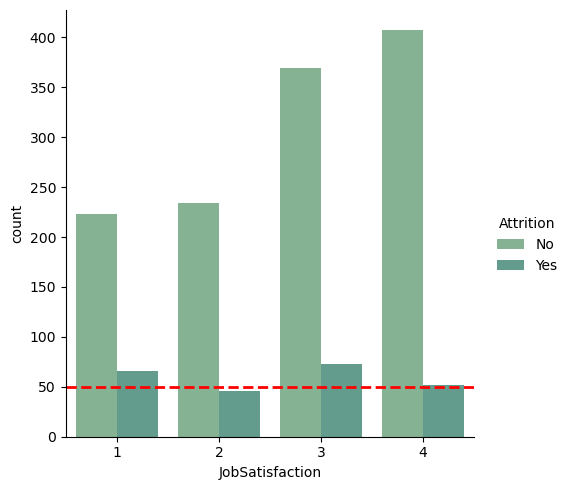

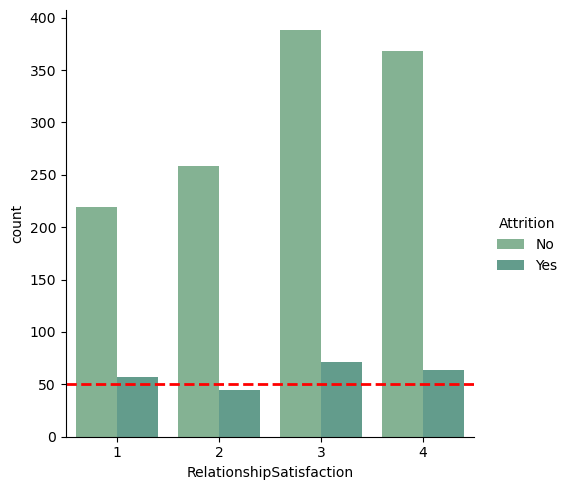

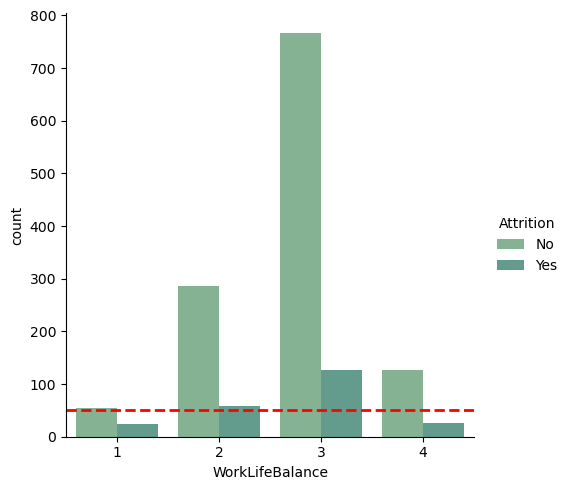

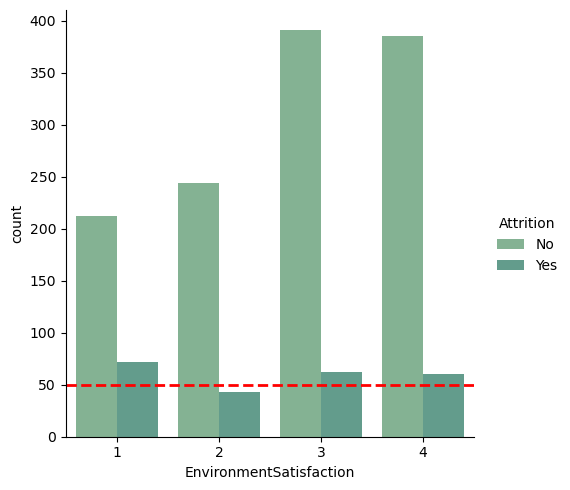

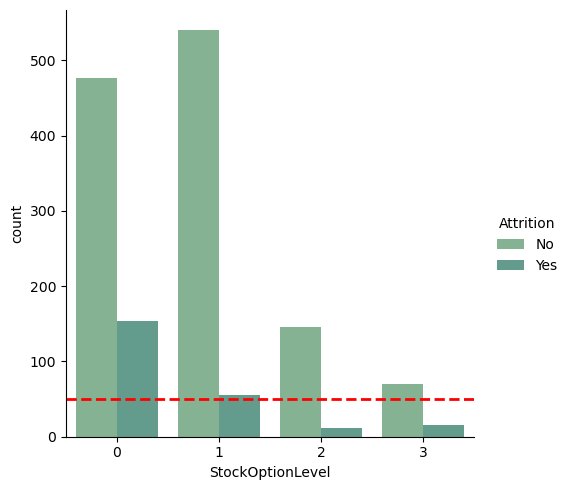

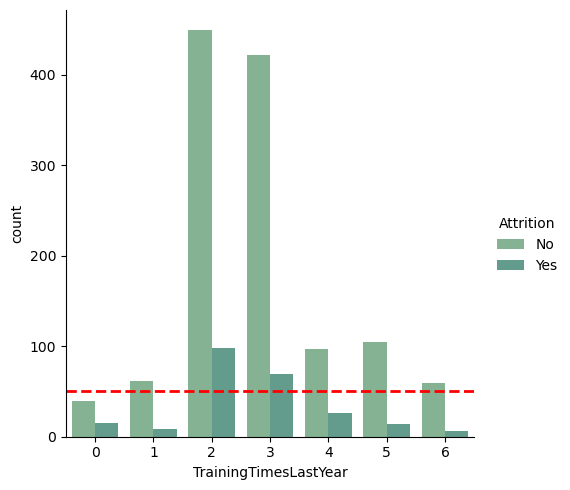

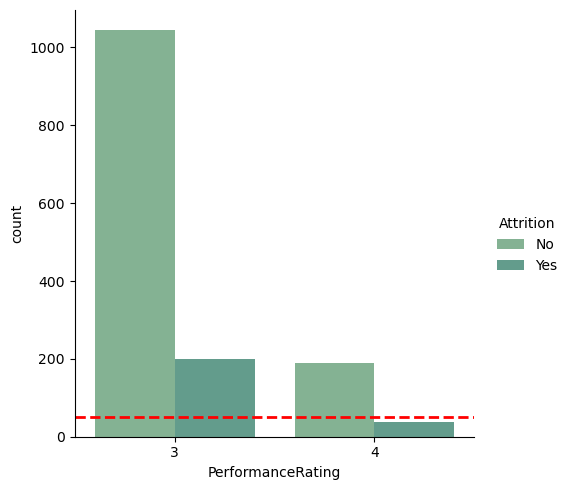

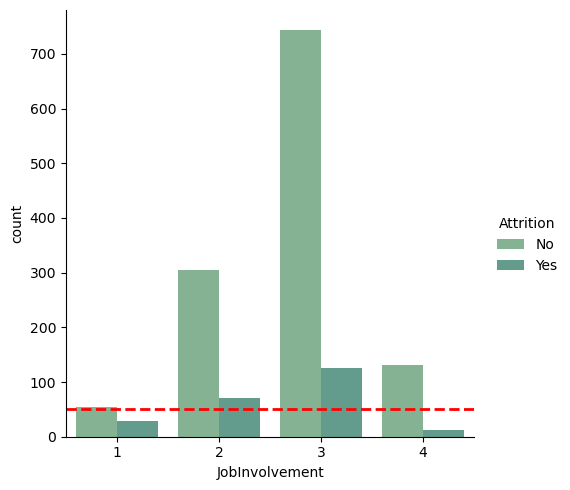

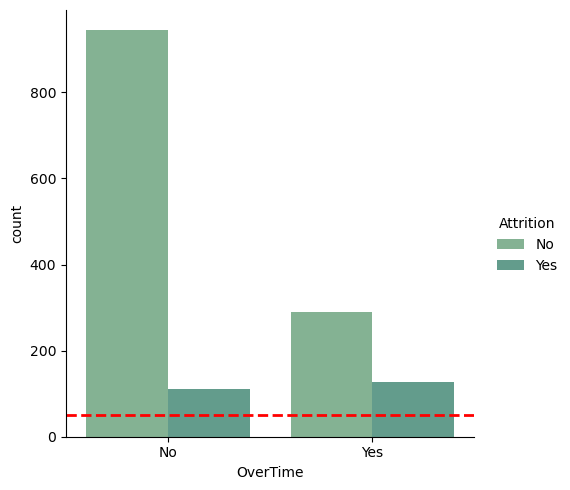

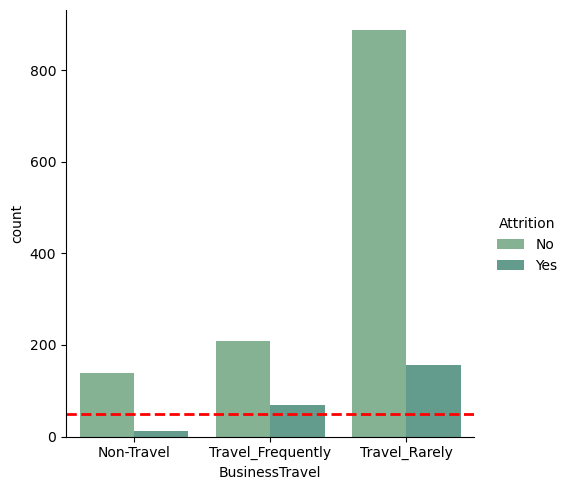

In [37]:
for feature in features_to_analyse:
    # print(feature)
    # fig = plt.figure()

    # plt.gcf().subplots_adjust(bottom=0.4)

    categories = data_df[feature].unique()
    # print(categories)
    temp = data_df.groupby([feature, 'Attrition']
                           ).size().reset_index(name='count')
    # print(temp)
    
    ax = sns.catplot(data=temp, x=feature, y="count", hue="Attrition", kind='bar')
    ax.map(plt.axhline, y=50, ls='--', color='r', linewidth=2)

    # for p in ax.patches:
    #     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
    #             fontsize=12, color='red', ha='center', va='bottom')
    plt.show()

# make percentage https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby/57359372#57359372
# replace percentage in the map 



In [ ]:
comparison_sets = [(SALARY, AGE),
                   (SALARY, YEARSEMPLOYED),
                   (LASTINCREMENTPERCENT, RATING)]

for feature_1, feature_2 in comparison_sets:
    filter_feature_id = None
    filter_feature_value = None
    # the index of the number of years at the company
    x_feature_idx = np.argwhere(header_massaged == feature_1).squeeze()

    # the index of the salary at the company
    y_feature_idx = np.argwhere(header_massaged == feature_2).squeeze()

    # the index of the salary at the company
    z_feature_idx = np.argwhere(header_massaged == ISRESIGNED_T).squeeze()

    if filter_feature_id != None:
        filter_feature_idx = np.argwhere(header_massaged == filter_feature_id)
        filtered_data = data_massaged[np.where(
            data_massaged[:, filter_feature_idx] == filter_feature_value), :]
    else:
        filtered_data = data_massaged

    x_data = filtered_data[:, x_feature_idx]
    y_data = filtered_data[:, y_feature_idx]
    z_data = filtered_data[:, z_feature_idx]

    

    left_color = 'lightcoral'
    remained_color = 'green'

    z_left = np.where(z_data == 0)
    z_remained = np.where(z_data == 1)

    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    plt.figure(1, figsize=(8, 8))
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    colors = [left_color, remained_color]

    axScatter.set_xlabel(feature_1)
    axScatter.set_ylabel(feature_2)

    axScatter.scatter(x_data, y_data, c=z_data,
                      cmap=ListedColormap(colors), alpha=0.5)

    x_bins = min(30, len(np.unique(x_data)))

    axHistx.hist(x_data[z_left], bins=x_bins, color=left_color, alpha=0.5)
    axHistx.hist(x_data[z_remained], bins=x_bins,
                 color=remained_color, alpha=0.5)

    x_left_hist = np.histogram(x_data[z_left], bins=x_bins)[0]
    x_remained_hist = np.histogram(x_data[z_remained], bins=x_bins)[0]
    # added a small factor to avoid division errors
    attrition = x_left_hist / (x_remained_hist + x_left_hist + 0.00005) * 100

    axHistx_2 = axHistx.twinx()
    axHistx_2.plot(np.histogram(
        x_data[z_left], bins=x_bins-1)[1], attrition, color='b')
    axHistx_2.set_ylim([0, 105])
    axHistx_2.set_ylabel('% Attrition')

    y_bins = min(30, len(np.unique(y_data)))

    axHisty.hist(y_data[z_left], bins=y_bins, color=left_color,
                 alpha=0.5, orientation='horizontal')
    axHisty.hist(y_data[z_remained], bins=y_bins, color=remained_color,
                 alpha=0.5, orientation='horizontal')

    plt.show()



In [ ]:
'''
Prepares the data set files used by the models.

Returns:
results -- dictionary containing the following
    train_x_nb -- training x for naive bayes data set
    train_y -- training y data set
    test_x_nb -- test x for naive bayes data set
    test_y -- test y data set
    train_x_nn -- training x for neural nets (& Logistic regression)  data set
    test_x_nn -- test x for neural nets (& Logistic regression)  data set
'''

# step 1:
column_drop_list = [EMPLYEENO_R, EMPLOYEECOUNT_R,
                    ISOVER18_R, STDHOURS_R]
encode_list = [GENDER_T, STATUS_T, DEPARTMENT_T, ROLE_T,
                OVERTIME_T, TRAVEL_T, ISRESIGNED_T, EDUCATION_T]


data_df = pd.read_table(orig_file, sep=',')

contains_nulls = False
# check that dataframe does not contain null values
if data_df.isnull().values.any():
    contains_nulls = True

# create a clone dataframe that will be 'massaged'
data_df_copy = data_df.copy(deep=True)

for encode_item in encode_list:
    data_df_copy[encode_item].replace(data_df_copy[encode_item].unique(), range(
        0, len(data_df_copy[encode_item].unique())), inplace=True)

for drop_column_item in column_drop_list:
    del data_df_copy[drop_column_item]

header_massaged = np.array(data_df_copy.columns.values).squeeze()
data_massaged = np.array(data_df_copy.values)
data_m_df = pd.DataFrame(data=data_massaged,
                         columns=header_massaged)
data_m_df.to_csv(processed_file, index=False)


# step 2:
np.random.shuffle(data_massaged)
data_orig = data_orig

train_set_size = (int)(data_massaged.shape[0] * .8)
test_set_size = (int)(data_massaged.shape[0] * .2)

train_set = data_orig[:train_set_size, :]
test_set = data_orig[train_set_size:train_set_size+test_set_size, :]
dev_set = data_orig[train_set_size+test_set_size:, :]


output_idx = np.argwhere(header_massaged == ISRESIGNED_T).squeeze()

train_y = train_set[:, output_idx]
train_x = np.delete(train_set, output_idx, 1)

test_y = test_set[:, output_idx]
test_x = np.delete(test_set, output_idx, 1)

traintest_header = np.delete(header_massaged, output_idx, 0)

data_m_df.to_csv(train_x_file, index=False)
data_m_df.to_csv(train_y_file, index=False)
data_m_df.to_csv(test_x_file, index=False)
data_m_df.to_csv(test_y_file, index=False)

# to execute naive bayes we will discretise continuous data
column_bins_definition = {AGE: 10, DAILYRATE: 10,
                            HOMEDISTANCE: 10, SALARY: 10,
                            HOURLYRATE: 10, MONTHLYRATE: 10,
                            YEARSEMPLOYED: 5, YEARSCOMPANY: 5,
                            YEARSROLE: 5, YEARSLASTPROMO: 5,
                            YEARSMANAGER: 5, LASTINCREMENTPERCENT: 16}

train_x_nb = digitize_columns(
    traintest_header, train_x, column_bins_definition)
test_x_nb = digitize_columns(
    traintest_header, test_x, column_bins_definition)

data_m_df.to_csv(train_x_nb_file, index=False)
data_m_df.to_csv(test_x_nb_file, index=False)

columns_norm = [AGE, DAILYRATE,
                HOMEDISTANCE, SALARY,
                HOURLYRATE, MONTHLYRATE,
                YEARSEMPLOYED, YEARSCOMPANY,
                YEARSROLE, YEARSLASTPROMO,
                YEARSMANAGER, LASTINCREMENTPERCENT]

train_x_lr = feature_scale_columns(traintest_header, train_x, columns_norm)
test_x_lr = feature_scale_columns(traintest_header, test_x, columns_norm)

data_m_df.to_csv(train_x_lr_file, index=False)
data_m_df.to_csv(test_x_lr_file, index=False)

encode_list_nn = [GENDER_T, STATUS_T, DEPARTMENT_T, ROLE_T,
                    OVERTIME_T, TRAVEL_T, EDUCATION_T,
                    ENVIRONMENT, INVOLVEMENT, LEVEL,
                    SATISFACTION, COMPANIES, RATING, TEAMCLICK,
                    STOCKOPTIONS, TRAINING, LIFEBALANCE]

train_test_header_nn, train_x_nn = encode_columns_nn(
    traintest_header, train_x_lr, encode_list_nn)
_, test_x_nn = encode_columns_nn(
    traintest_header, test_x_lr, encode_list_nn)

data_m_df.to_csv(train_x_nn_file, index=False)
data_m_df.to_csv(test_x_nn_file, index=False)

results = {}

results['train_x_nb'] = train_x_nb
results['train_y'] = train_y
results['test_x_nb'] = test_x_nb
results['test_y'] = test_y
results['train_x_nn'] = train_x_nn
results['test_x_nn'] = test_x_nn

In [ ]:
# results -- dictionary containing the following
#     train_x_nb -- training x for naive bayes data set
#     train_y -- training y data set
#     test_x_nb -- test x for naive bayes data set
#     test_y -- test y data set
#     train_x_nn -- training x for neural nets (& Logistic regression)  data set
#     test_x_nn -- test x for neural nets (& Logistic regression)  data set

train_x_nb = np.array(pd.read_table(train_x_nb_file, sep=',').values)
train_y = np.array(pd.read_table(train_x_nb_file, sep=',').values)
test_x_nb = np.array(pd.read_table(test_x_nb_file, sep=',').values)
test_y = np.array(pd.read_table(test_y_file, sep=',').values)
train_x_nn = np.array(pd.read_table(train_x_nn_file, sep=',').values)
test_x_nn = np.array(pd.read_table(test_x_nn_file, sep=',').values)


model_data = {}
model_data['train_x_nb'] = train_x_nb
model_data['train_y'] = train_y
model_data['test_x_nb'] = test_x_nb
model_data['test_y'] = test_y
model_data['train_x_nn'] = train_x_nn
model_data['test_x_nn'] = test_x_nn



And finally, the models were executed. An execution function was created for this purpose. The models were used using the scikit library, although other libraries such as tensorflow could have been used.

In [ ]:
def execute_classifier(classifier_name, classifier, train_x, train_y, test_x, test_y):
    '''
    Executes a classifier given the test and train data. Calculates the execution time for the 
    training

    Arguments:
    classifier_name -- the name of the classifier, for printing purposes
    classifier -- the actual classifier
    train_x -- training x data
    train_y -- training y data
    test_x -- testing x data
    test_y -- testing y data

    Returns:
    prints the result of the training and testing, together with the traioning execution time required
    test-score -- the testing score for this classifier
    '''
    t_start = time.time()
    classifier.fit(train_x, train_y.ravel())
    t_end = time.time()
    time_diff = t_end - t_start

    train_score = classifier.score(train_x, train_y)
    test_score = classifier.score(test_x, test_y)

    print('{} -  \t train score: {},\t test score: {},\t time:{}'.format(
        classifier_name, train_score, test_score, time_diff))

    return test_score


In [ ]:
# KNN
classifier = KNeighborsClassifier(n_neighbors=3)
test_score = execute_classifier("K - N N", classifier, model_data['train_x_nb'], model_data['train_y'], model_data['test_x_nb'], model_data['test_y'])

In [ ]:
# naive bayes
classifier = MultinomialNB(alpha=1)
test_score = execute_classifier("Naive Bayes", classifier, model_data['train_x_nb'], model_data['train_y'], model_data['test_x_nb'], model_data['test_y'])

In [ ]:
# logistic regression
classifier = LogisticRegression()
test_score = execute_classifier("Log Reg", classifier, model_data['train_x_nn'], model_data['train_y'], model_data['test_x_nn'], model_data['test_y'])

In [ ]:
# neural net
classifier = MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(256,64), max_iter=300)
test_score = execute_classifier("N Net", classifier, model_data['train_x_nn'], model_data['train_y'], model_data['test_x_nn'], model_data['test_y'])